In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.preprocessing import PolynomialFeatures
from scipy.integrate import simps
from numpy import trapz
from sklearn import metrics

# Galaxia de Andrómeda


Velocidad orbital:

$V_{orbital}(r)=\sqrt{\dfrac{GM}{r}}$


In [3]:
def v(r,M): #velocidad órbital
    G= 6.67408*10**(-20) #km^3/kg.s^2
    return np.sqrt((G*M)/(r*3.086*10**(16)))

In [4]:
Vandr=[235.5,242.9,251.1,262.0,258.9,255.1,251.8,252.1,251.0,245.5,232.8,232.0,235.7,
        229.3,227.6,260,225.7,227.5,227.4,225.6,224.4,222.3,222.1,224.9,228.1,231.1,230.4,226.8] #km/s

Randr=np.array([5.68,6.81,7.95,9.08,10.22,11.32,12.49,13.62,14.76,15.89,17.03,
                18.16,19.30,20.43,21.45,22.47,23.50,24.52,25.54,26.56,
               27.58,28.60,29.62,30.65,31.67,32.69,33.71,34.73])#kpc
Mandr= 1.989*10**(41) #kg


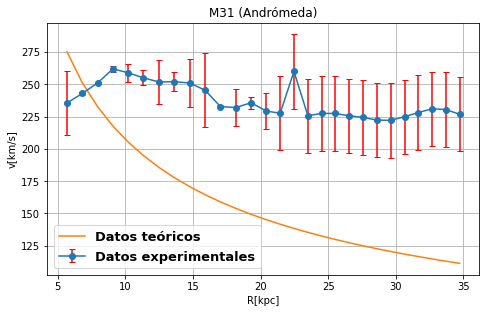

In [5]:
error= np.array([25,0.8,0.7,2.1,6.9,5.7,17.1,7.4,18.6,28.8,1,14.2,4.6,13.8,28.8,28.8,28.8,
               28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8]) # Error asociado a cada velocidad

font = {'weight' : 'bold', 'size'  :13}

fig, ax=plt.subplots()
fig.subplots_adjust( left=100, right=101, top=1)

ax.errorbar(Randr, Vandr, yerr=error,marker="o",
           ecolor="Red",
           capsize=3,
           label= 'Datos experimentales')
ax.plot(Randr, v(Randr,Mandr), label= 'Datos teóricos')
ax.grid()
ax.set(title='M31 (Andrómeda)' , xlabel='R[kpc]', ylabel='v[km/s]')
plt.rc('font',**font)
plt.legend()
plt.show()

# Método para calcular la masa de una galaxia teniendo la curva de rotación


Con la curva de rotación a disposición, se utiliza un modelo para calcular la masa contenida hasta un radio $r$.

Tomamos la masa en función del radio, es decir, $M=M(r)$.


La densidad de masa $\rho = \dfrac{dM}{dV}$, la masa contenida hasta un radio $r_t$ está dada por

$M_t=\int_{0}^{r_t} \rho(r)4\pi r^2 dr$

dado que $dV=4\pi r^2 dr$. Del teorema del virial

$\hspace{7.0cm} v^2(r)=\dfrac{GM(r)}{r}$

Y por regla de la cadena $\dfrac{dM(r)}{dV}=\dfrac{dM(r)}{dr} \dfrac{dr}{dV}$

$\hspace{7.0cm} \rho(r)=\dfrac{v^2(r)}{4\pi r^2 G}$

Teniendo estas ecuaciones, obtenemos lo siguiente

$\hspace{7.0cm} M_t=\int_{0}^{r_t} \dfrac{v^2(r)}{G} dr=\dfrac{1}{G}\int_{0}^{r_t}v^2(r)dr$

Por lo tanto la masa es el área bajo la curva de $v^2(r)$ vs $r$

In [6]:
Vandr2=np.array(Vandr)**2 # velocidad orbital al cuadrado

MasaAndromeda = simps(Vandr2, x=Randr*3.08*10**(16))*1/(6.67408*10**(-20)) #Calculo del àrea bajo la curva

print("La masa de la galaxia de Andrómeda es, en kilogramos, de:" %MasaAndromeda)

La masa de la galaxia de Andrómeda es, en kilogramos, de:
